In [87]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
url = "https://www.espn.com/golf/stats/player"

In [89]:
response = requests.get(url)
response.status_code

200

In [90]:
dfs = pd.read_html(url)

In [91]:
dfs

[    RK               Name  AGE
 0    1  Scottie Scheffler   26
 1    2           Jon Rahm   28
 2    3           Max Homa   32
 3    4      Kurt Kitayama   30
 4    5       Rory McIlroy   33
 5    6          Sam Burns   26
 6    7     Tyrrell Hatton   31
 7    8     Keegan Bradley   36
 8    9          Jason Day   35
 9   10    Patrick Cantlay   31
 10  11           Tom Hoge   33
 11  12    Collin Morikawa   26
 12  13     Viktor Hovland   25
 13  14         Tony Finau   33
 14  15      Cameron Young   25
 15  16        Nick Taylor   34
 16  17    Sahith Theegala   25
 17  18      Adam Svensson   29
 18  19         Sungjae Im   25
 19  20       Seamus Power   36
 20  21      Rickie Fowler   34
 21  22            Tom Kim   20
 22  23        Justin Rose   42
 23  24     Harris English   33
 24  25         Chris Kirk   37
 25  26       Taylor Moore   29
 26  27   Mackenzie Hughes   32
 27  28      Jordan Spieth   29
 28  29         Si Woo Kim   27
 29  30  Xander Schauffele   29
 30  31 

In [92]:
age = dfs[0]

In [93]:
stats = dfs[1]

In [94]:
url2 = 'https://www.espn.com/golf/rankings'

In [95]:
dfs2 = pd.read_html(url2)

In [96]:
rank = dfs2[0]

In [97]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RK      50 non-null     int64 
 1   Name    50 non-null     object
 2   AGE     50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [98]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  50 non-null     object 
 1   CUP       50 non-null     int64  
 2   EVNTS     50 non-null     int64  
 3   RNDS      50 non-null     int64  
 4   CUTS      50 non-null     int64  
 5   TOP10     50 non-null     int64  
 6   WINS      50 non-null     int64  
 7   SCORE     50 non-null     float64
 8   DDIS      50 non-null     float64
 9   DACC      50 non-null     float64
 10  GIR       50 non-null     float64
 11  PUTTS     50 non-null     float64
 12  SAND      50 non-null     float64
 13  BIRDS     50 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory usage: 5.6+ KB


In [99]:
rank

,RK,NAME
0,1,Scottie Scheffler
1,2,Rory McIlroy
2,3,Jon Rahm
3,4,Patrick Cantlay
4,5,Cameron Smith
...,...,...
195,196,Lanto Griffin
196,197,Chan Kim
197,198,Laurie Canter
198,199,Connor Syme


In [100]:
age = age.drop(['RK'],axis=1)

In [101]:
twoofthree = age.join(stats)

In [102]:
rank = rank.rename(columns={'NAME': 'Name'})

In [103]:
fin = twoofthree.merge(rank)

In [104]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   AGE       50 non-null     int64  
 2   EARNINGS  50 non-null     object 
 3   CUP       50 non-null     int64  
 4   EVNTS     50 non-null     int64  
 5   RNDS      50 non-null     int64  
 6   CUTS      50 non-null     int64  
 7   TOP10     50 non-null     int64  
 8   WINS      50 non-null     int64  
 9   SCORE     50 non-null     float64
 10  DDIS      50 non-null     float64
 11  DACC      50 non-null     float64
 12  GIR       50 non-null     float64
 13  PUTTS     50 non-null     float64
 14  SAND      50 non-null     float64
 15  BIRDS     50 non-null     float64
 16  RK        50 non-null     int64  
dtypes: float64(7), int64(8), object(2)
memory usage: 7.0+ KB


In [105]:
url3 = 'https://www.espn.com/golf/stats/player/_/table/general/sort/amount/dir/asc'

In [106]:
dfs3 = pd.read_html(url3)

In [107]:
age2 = dfs3[0]

In [108]:
age2 = age2.drop(['RK'],axis=1)

In [109]:
stat2 = dfs3[1]

In [110]:
df2 = age2.join(stat2)

In [111]:
bottomandTop = pd.concat([twoofthree,df2])

In [112]:
url4 = 'https://www.espn.com/golf/stats/player/_/table/general/sort/topTenFinishes/dir/asc'

In [113]:
dfs4 = pd.read_html(url4)

In [114]:
age3 = dfs4[0]

In [115]:
age3 = age3.drop(['RK'],axis=1)

In [116]:
stat3 = dfs4[1]

In [117]:
df3 = age3.join(stat3)

In [118]:
middle = pd.concat([bottomandTop,df3])

In [119]:
middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 49
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      150 non-null    object 
 1   AGE       150 non-null    object 
 2   EARNINGS  150 non-null    object 
 3   CUP       150 non-null    int64  
 4   EVNTS     150 non-null    int64  
 5   RNDS      150 non-null    int64  
 6   CUTS      150 non-null    int64  
 7   TOP10     150 non-null    int64  
 8   WINS      150 non-null    int64  
 9   SCORE     150 non-null    float64
 10  DDIS      150 non-null    float64
 11  DACC      150 non-null    float64
 12  GIR       150 non-null    float64
 13  PUTTS     150 non-null    float64
 14  SAND      150 non-null    float64
 15  BIRDS     150 non-null    float64
dtypes: float64(7), int64(6), object(3)
memory usage: 19.9+ KB


In [120]:
url5 = 'https://www.espn.com/golf/stats/player/_/table/general/sort/cutsMade/dir/asc'

In [121]:
dfs5 = pd.read_html(url5)

In [122]:
age5 = dfs5[0]

In [123]:
age5 = age5.drop(['RK'],axis=1)

In [124]:
stat4 = dfs5[1]

In [125]:
df4 = age5.join(stat4)

In [126]:
allGolfers = pd.concat([df4,middle])

In [127]:
allGolfers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 49
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      200 non-null    object 
 1   AGE       200 non-null    object 
 2   EARNINGS  200 non-null    object 
 3   CUP       200 non-null    int64  
 4   EVNTS     200 non-null    int64  
 5   RNDS      200 non-null    int64  
 6   CUTS      200 non-null    int64  
 7   TOP10     200 non-null    int64  
 8   WINS      200 non-null    int64  
 9   SCORE     200 non-null    float64
 10  DDIS      200 non-null    float64
 11  DACC      200 non-null    float64
 12  GIR       200 non-null    float64
 13  PUTTS     200 non-null    float64
 14  SAND      200 non-null    float64
 15  BIRDS     200 non-null    float64
dtypes: float64(7), int64(6), object(3)
memory usage: 26.6+ KB


In [128]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RK      200 non-null    int64 
 1   Name    200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [129]:
use = rank.merge(allGolfers,on='Name', how='right')

In [130]:
use = use.drop(['RK_y'],axis=1)

KeyError: "['RK_y'] not found in axis"

In [131]:
use.head()

,RK,Name,AGE,EARNINGS,CUP,EVNTS,RNDS,CUTS,TOP10,WINS,SCORE,DDIS,DACC,GIR,PUTTS,SAND,BIRDS
0,NaN,Brian Gay,51,"$134,875",60,5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,Jerry Kelly,56,"$58,000",7,2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,D.J. Trahan,42,"$12,350",7,3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,Tiger Woods,47,"$59,560",11,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,Erik Compton,43,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
use.sort_values(by=['Name'])

,RK,Name,AGE,EARNINGS,CUP,EVNTS,RNDS,CUTS,TOP10,WINS,SCORE,DDIS,DACC,GIR,PUTTS,SAND,BIRDS
185,124.0,Aaron Rai,28,"$997,290",261,15,53,12,1,0,70.2,291.9,68.1,70.3,1.781,34.6,3.774
182,45.0,Aaron Wise,26,"$997,958",283,11,33,7,1,0,69.8,301.4,60.2,63.6,1.690,27.8,4.212
90,62.0,Adam Hadwin,35,"$1,799,445",405,13,44,11,3,0,69.8,293.7,63.9,67.7,1.729,51.5,4.000
180,89.0,Adam Schenk,31,"$1,803,965",584,17,59,13,1,0,70.3,304.4,53.7,66.1,1.806,49.0,3.610
89,89.0,Adam Schenk,31,"$1,803,965",584,17,59,13,1,0,70.3,304.4,53.7,66.1,1.806,49.0,3.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,NaN,Yeongsu Kim,33,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
45,NaN,Yongjun Bae,22,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
48,155.0,Yuto Katsuragawa,--,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
170,NaN,Zac Blair,32,"$415,344",159,12,36,6,1,0,70.4,278.3,66.8,63.4,1.754,58.3,3.750


## EDA

In [ ]:
use.info()

In [46]:
use.sort_values(by=['EARNINGS'])

,RK,Name,AGE,EARNINGS,CUP,EVNTS,RNDS,CUTS,TOP10,WINS,SCORE,DDIS,DACC,GIR,PUTTS,SAND,BIRDS
158,23.0,Shane Lowry,35,"$1,001,954",227,7,22,6,1,0,70.6,305.2,64.0,65.7,1.762,50.0,3.455
194,188.0,Garrick Higgo,23,"$1,007,449",359,15,46,9,1,0,70.6,301.8,54.2,67.9,1.779,50.7,4.000
159,175.0,Tyson Alexander,34,"$1,098,016",373,15,49,9,1,0,70.9,296.5,53.8,62.8,1.760,52.6,3.694
169,15.0,Matt Fitzpatrick,28,"$1,134,268",243,9,25,5,1,0,70.5,304.0,58.4,64.9,1.753,51.6,3.720
177,63.0,Davis Riley,26,"$1,223,251",312,16,51,12,1,0,70.5,298.5,58.1,68.5,1.769,44.8,3.824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,NaN,Fabrizio Zanotti,39,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
175,NaN,Cole Hammer,23,0,0,0,0,5,1,0,0.0,291.0,56.4,61.8,1.745,47.5,0.000
15,NaN,Ryan Blaum,39,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000
34,NaN,Paul O'Hara,--,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.000,0.0,0.000


In [133]:
money = '\W'

In [134]:
#re.sub(money,'',use['EARNINGS'])
use['EARNINGS'] = [re.sub(money,'', str(x)) for x in use['EARNINGS']]

In [135]:
use['EARNINGS'] =[int(x) for x in use['EARNINGS']]
use['EARNINGS']

0       134875
1        58000
2        12350
3        59560
4            0
        ...   
195    1490138
196          0
197     954820
198    1520047
199     879458
Name: EARNINGS, Length: 200, dtype: int64

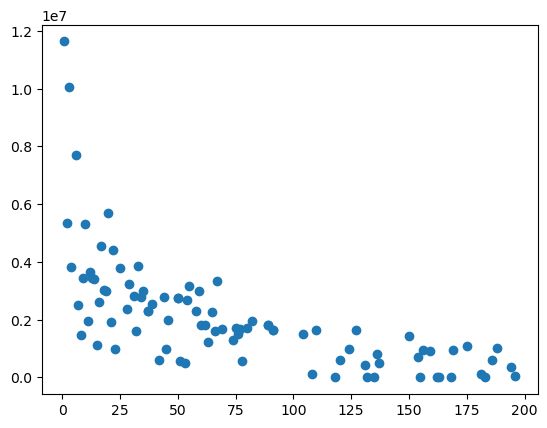

In [50]:
plt.scatter(use['RK'],use['EARNINGS'])

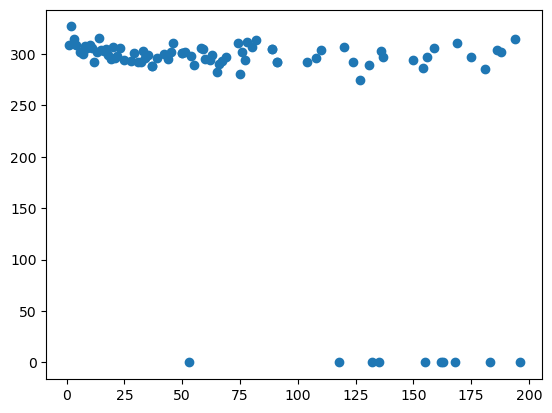

In [51]:
plt.scatter(use['RK'],use['DDIS'])

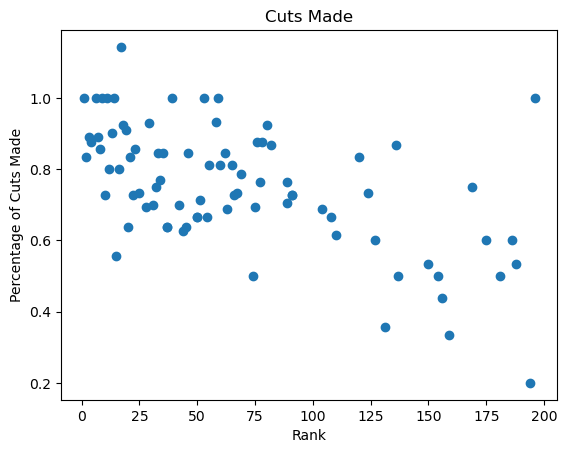

In [77]:
plt.scatter(use['RK'],use['CUTS']/use['EVNTS'])
plt.xlabel('Rank')
plt.ylabel('Percentage of Cuts Made')
plt.title('Cuts Made')
#plt.savefig('Cuts.png')

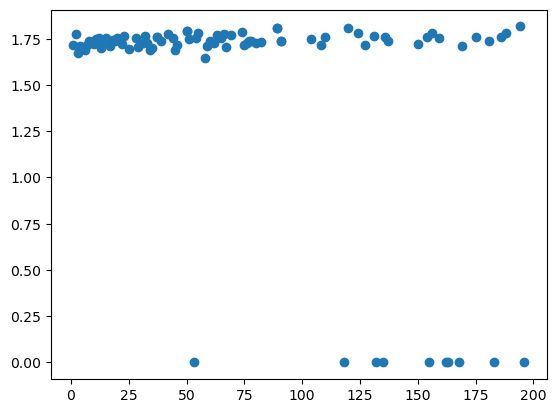

In [56]:
plt.scatter(use['RK'],use['PUTTS'])

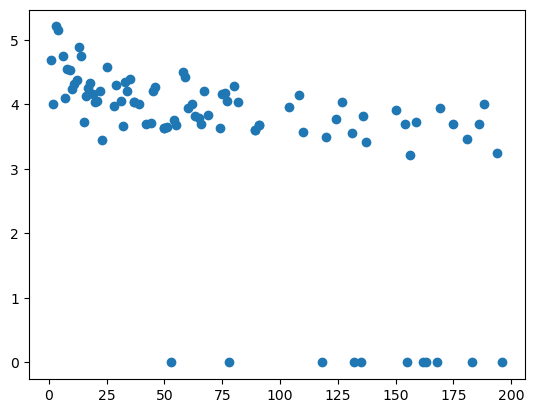

In [58]:
plt.scatter(use['RK'],use['BIRDS'])

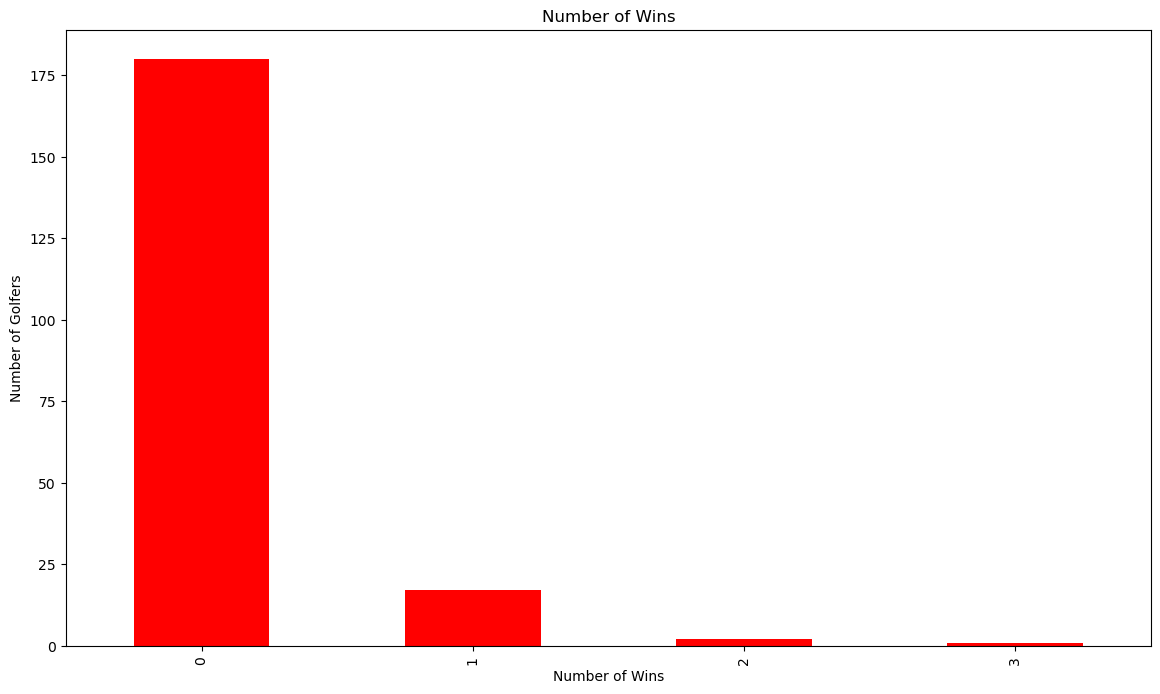

In [113]:
ax = use['WINS'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Wins",
                                    ylabel="Number of Golfers",
                                    xlabel="Number of Wins",
                                    color = 'red')

plt.savefig('wins.png')

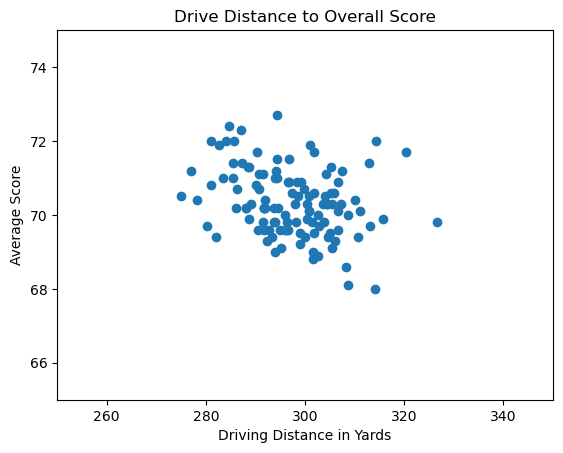

In [52]:
# fig, ax = plt.subplots
# ax.plot(use['EVNTS'],use['RK'])
# plt.show
plt.scatter(use['DDIS'],use['SCORE'])
plt.xlim([250,350])
plt.ylim([65,75])
plt.xlabel('Driving Distance in Yards')
plt.ylabel('Average Score')
plt.title('Drive Distance to Overall Score')
plt.savefig('driveD.png')

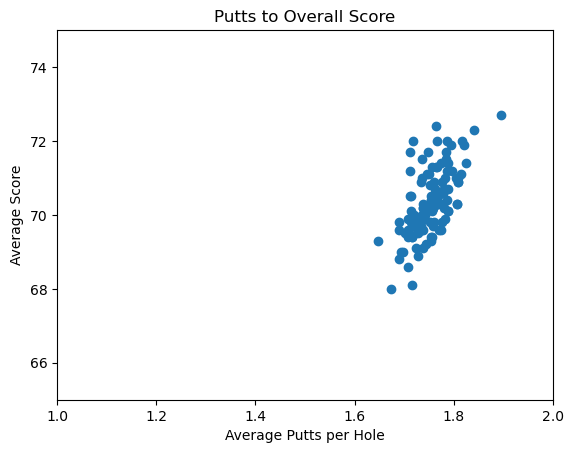

In [53]:
plt.scatter(use['PUTTS'],use['SCORE'])
plt.xlim([1,2])
plt.ylim([65,75])
plt.xlabel('Average Putts per Hole')
plt.ylabel('Average Score')
plt.title('Putts to Overall Score')
plt.savefig('putt.png')

In [137]:
use['AGE'] = [re.sub('--','Nan', str(x)) for x in use['AGE']]

['Nan5Nan1Nan',
 'Nan5Nan6Nan',
 'Nan4Nan2Nan',
 'Nan4Nan7Nan',
 'Nan4Nan3Nan',
 'Nan5Nan0Nan',
 'Nan4Nan3Nan',
 'Nan4Nan6Nan',
 'Nan4Nan6Nan',
 'Nan4Nan6Nan',
 'Nan4Nan2Nan',
 'Nan3Nan8Nan',
 'Nan4Nan2Nan',
 'Nan4Nan3Nan',
 'Nan3Nan9Nan',
 'Nan3Nan9Nan',
 'Nan4Nan0Nan',
 'Nan3Nan9Nan',
 'Nan4Nan2Nan',
 'Nan3Nan6Nan',
 'Nan2Nan9Nan',
 'Nan3Nan2Nan',
 'Nan3Nan6Nan',
 'Nan3Nan2Nan',
 'Nan3Nan3Nan',
 'Nan3Nan6Nan',
 'Nan',
 'Nan3Nan2Nan',
 'Nan3Nan2Nan',
 'Nan3Nan3Nan',
 'Nan3Nan0Nan',
 'Nan',
 'Nan',
 'Nan3Nan3Nan',
 'Nan',
 'Nan2Nan6Nan',
 'Nan2Nan2Nan',
 'Nan2Nan6Nan',
 'Nan2Nan6Nan',
 'Nan',
 'Nan3Nan0Nan',
 'Nan2Nan8Nan',
 'Nan2Nan4Nan',
 'Nan3Nan0Nan',
 'Nan2Nan8Nan',
 'Nan2Nan2Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan2Nan4Nan',
 'Nan2Nan6Nan',
 'Nan2Nan8Nan',
 'Nan3Nan2Nan',
 'Nan3Nan0Nan',
 'Nan3Nan3Nan',
 'Nan2Nan6Nan',
 'Nan3Nan1Nan',
 'Nan3Nan6Nan',
 'Nan3Nan5Nan',
 'Nan3Nan1Nan',
 'Nan3Nan3Nan',
 'Nan2Nan6Nan',
 'Nan2Nan5Nan',
 'Nan3Nan3Nan',
 'Nan2Nan5Nan',
 'Nan3Nan4Nan',
 'Nan2Na

In [76]:
use['AGE'][26]

'--'

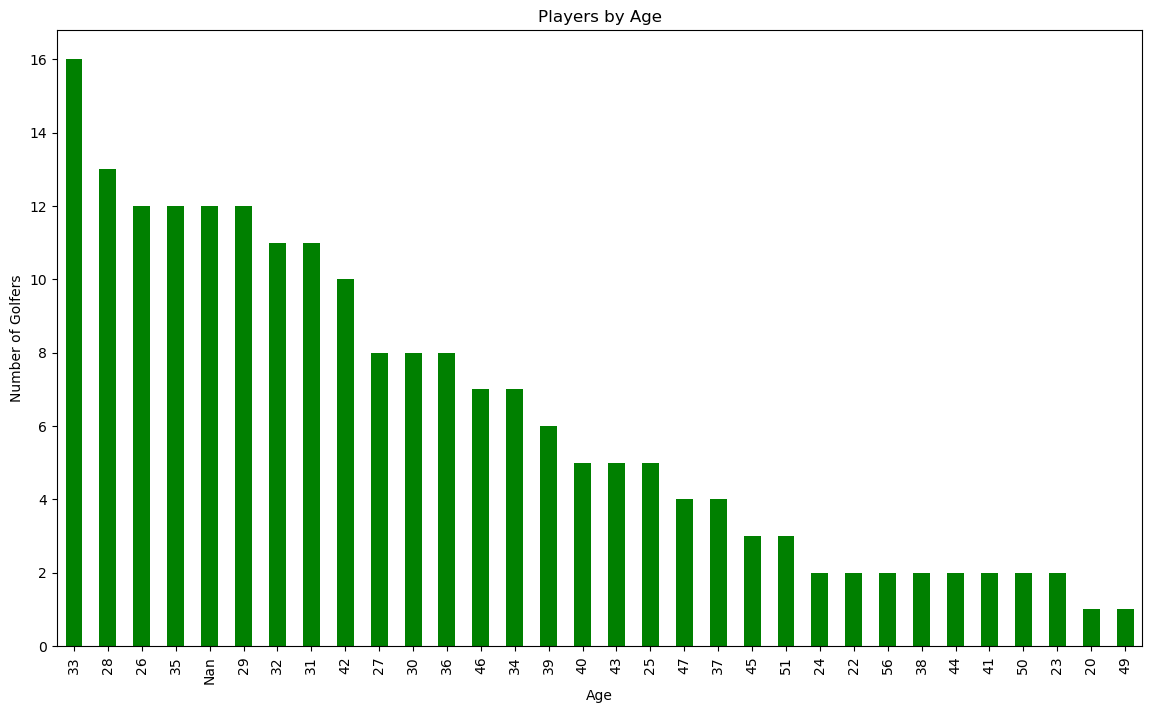

In [140]:
ax = use['AGE'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Players by Age",
                                    ylabel="Number of Golfers",
                                    xlabel="Age",
                                    color = 'green')
plt.savefig('age.png')